# PART C

In [4]:
#General imports

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import random
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz 

In [2]:
#Function to find RMSE MSE MAE R2

def reg_metrics(y_test, y_pred, x_train,y_pred_train,y_train):
    
    #imports
    from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


    #calculate
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    MSE = mean_squared_error(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2_Test = r2_score(y_test,y_pred)
    R2_Train = r2_score(y_train,y_pred_train)
    
    #print
    print("RMSE: " + str(round(RMSE,3)))
    print("MSE:  " + str(round(MSE,3)))
    print("MAE:  " +  str(round(MAE,3)))
    print("R2_Test:   " + str(round(R2_Test,3)))
    print("R2_Train:   " + str(round(R2_Train,3)))

In [3]:
#Prepare the data

expidiaHotels = pd.read_csv('expidiaHotelsClean.csv')


#features + target

x = expidiaHotels[['Rate','Review','LengthOfStay']]
y = expidiaHotels['Price']
data = expidiaHotels[['Rate','Review','LengthOfStay','Price']]


#test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

RMSE: 1145.825
MSE:  1312914.534
MAE:  839.672
R2_Test:   0.716
R2_Train:   0.72


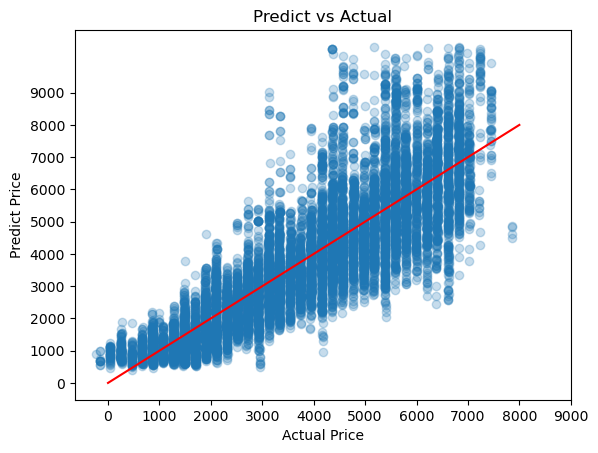

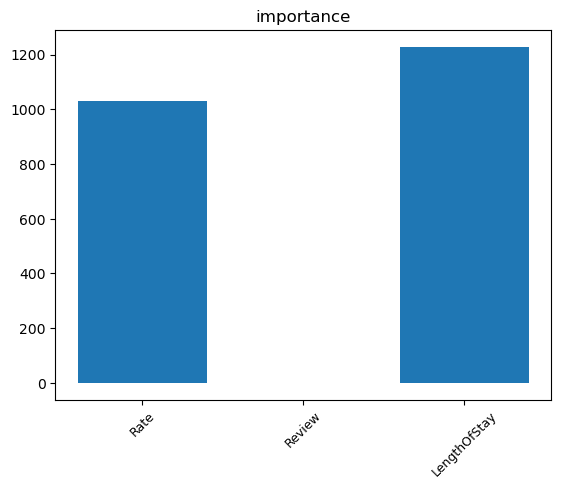

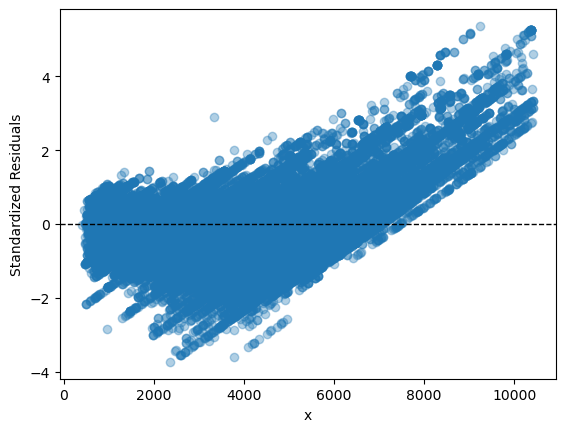

In [4]:
#LinearRegression



# Create model
from sklearn import linear_model
reg = linear_model.LinearRegression()
from matplotlib import pyplot

# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)



#Actual vs Predict
plt.title('Predict vs Actual')
plt.xlabel("Actual Price")
plt.ylabel("Predict Price")
X = np.linspace(0,8000,100)
Y = 1*X+0
plt.plot(X, Y, '-r')
plt.scatter(y_pred_test,y_test,alpha=0.25)
plt.xticks(np.arange(0,10000,step=1000))
plt.yticks(np.arange(0,10000,step=1000))
plt.show()




# get importance
plt.title('importance')
importance = reg.coef_
# summarize feature importance
pyplot.bar([x.columns[j] for j in range(len(importance))], importance)
pyplot.xticks(fontsize = 9,rotation=45)
pyplot.show()





import statsmodels.api as sm

#add constant to predictor variables
x_r = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x_r).fit() 


#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal



plt.scatter(expidiaHotels['Price'], standardized_residuals,alpha=0.35)
plt.xlabel('x')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

In [5]:
#DecisionTreeRegressor

# Create model
from sklearn import tree
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
for i in range(1, 10):
    print("\n",i, ")")
    for j in range(1,10):
        print("\n",j, ")")
        
       #check criterions 
        reg = tree.DecisionTreeRegressor(criterion='mse', max_depth=i , min_samples_leaf=j, random_state=101)
        #reg = tree.DecisionTreeRegressor(criterion='friedman_mse', max_depth=i , min_samples_leaf=j, random_state=101)
        #reg = tree.DecisionTreeRegressor(criterion='mae', max_depth=i , min_samples_leaf=j, random_state=101)
        #reg = tree.DecisionTreeRegressor(criterion='poisson', max_depth=i , min_samples_leaf=j, random_state=101)

# Train the model
        
        reg.fit(x_train, y_train)
    
# Make predictions
        y_pred_test = reg.predict(x_test)
        y_pred_train = reg.predict(x_train)


#Calculate
        reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)



 1 )

 1 )
RMSE: 1501.725
MSE:  2255177.407
MAE:  1160.946
R2_Test:   0.513
R2_Train:   0.512

 2 )
RMSE: 1501.725
MSE:  2255177.407
MAE:  1160.946
R2_Test:   0.513
R2_Train:   0.512

 3 )
RMSE: 1501.725
MSE:  2255177.407
MAE:  1160.946
R2_Test:   0.513
R2_Train:   0.512

 4 )
RMSE: 1501.725
MSE:  2255177.407
MAE:  1160.946
R2_Test:   0.513
R2_Train:   0.512

 5 )
RMSE: 1501.725
MSE:  2255177.407
MAE:  1160.946
R2_Test:   0.513
R2_Train:   0.512

 6 )
RMSE: 1501.725
MSE:  2255177.407
MAE:  1160.946
R2_Test:   0.513
R2_Train:   0.512

 7 )
RMSE: 1501.725
MSE:  2255177.407
MAE:  1160.946
R2_Test:   0.513
R2_Train:   0.512

 8 )
RMSE: 1501.725
MSE:  2255177.407
MAE:  1160.946
R2_Test:   0.513
R2_Train:   0.512

 9 )
RMSE: 1501.725
MSE:  2255177.407
MAE:  1160.946
R2_Test:   0.513
R2_Train:   0.512

 2 )

 1 )
RMSE: 1312.01
MSE:  1721371.415
MAE:  940.302
R2_Test:   0.628
R2_Train:   0.636

 2 )
RMSE: 1312.01
MSE:  1721371.415
MAE:  940.302
R2_Test:   0.628
R2_Train:   0.636

 3 )
RMSE: 1

RMSE: 837.424
MSE:  701278.266
MAE:  576.609
R2_Test:   0.849
R2_Train:   0.856


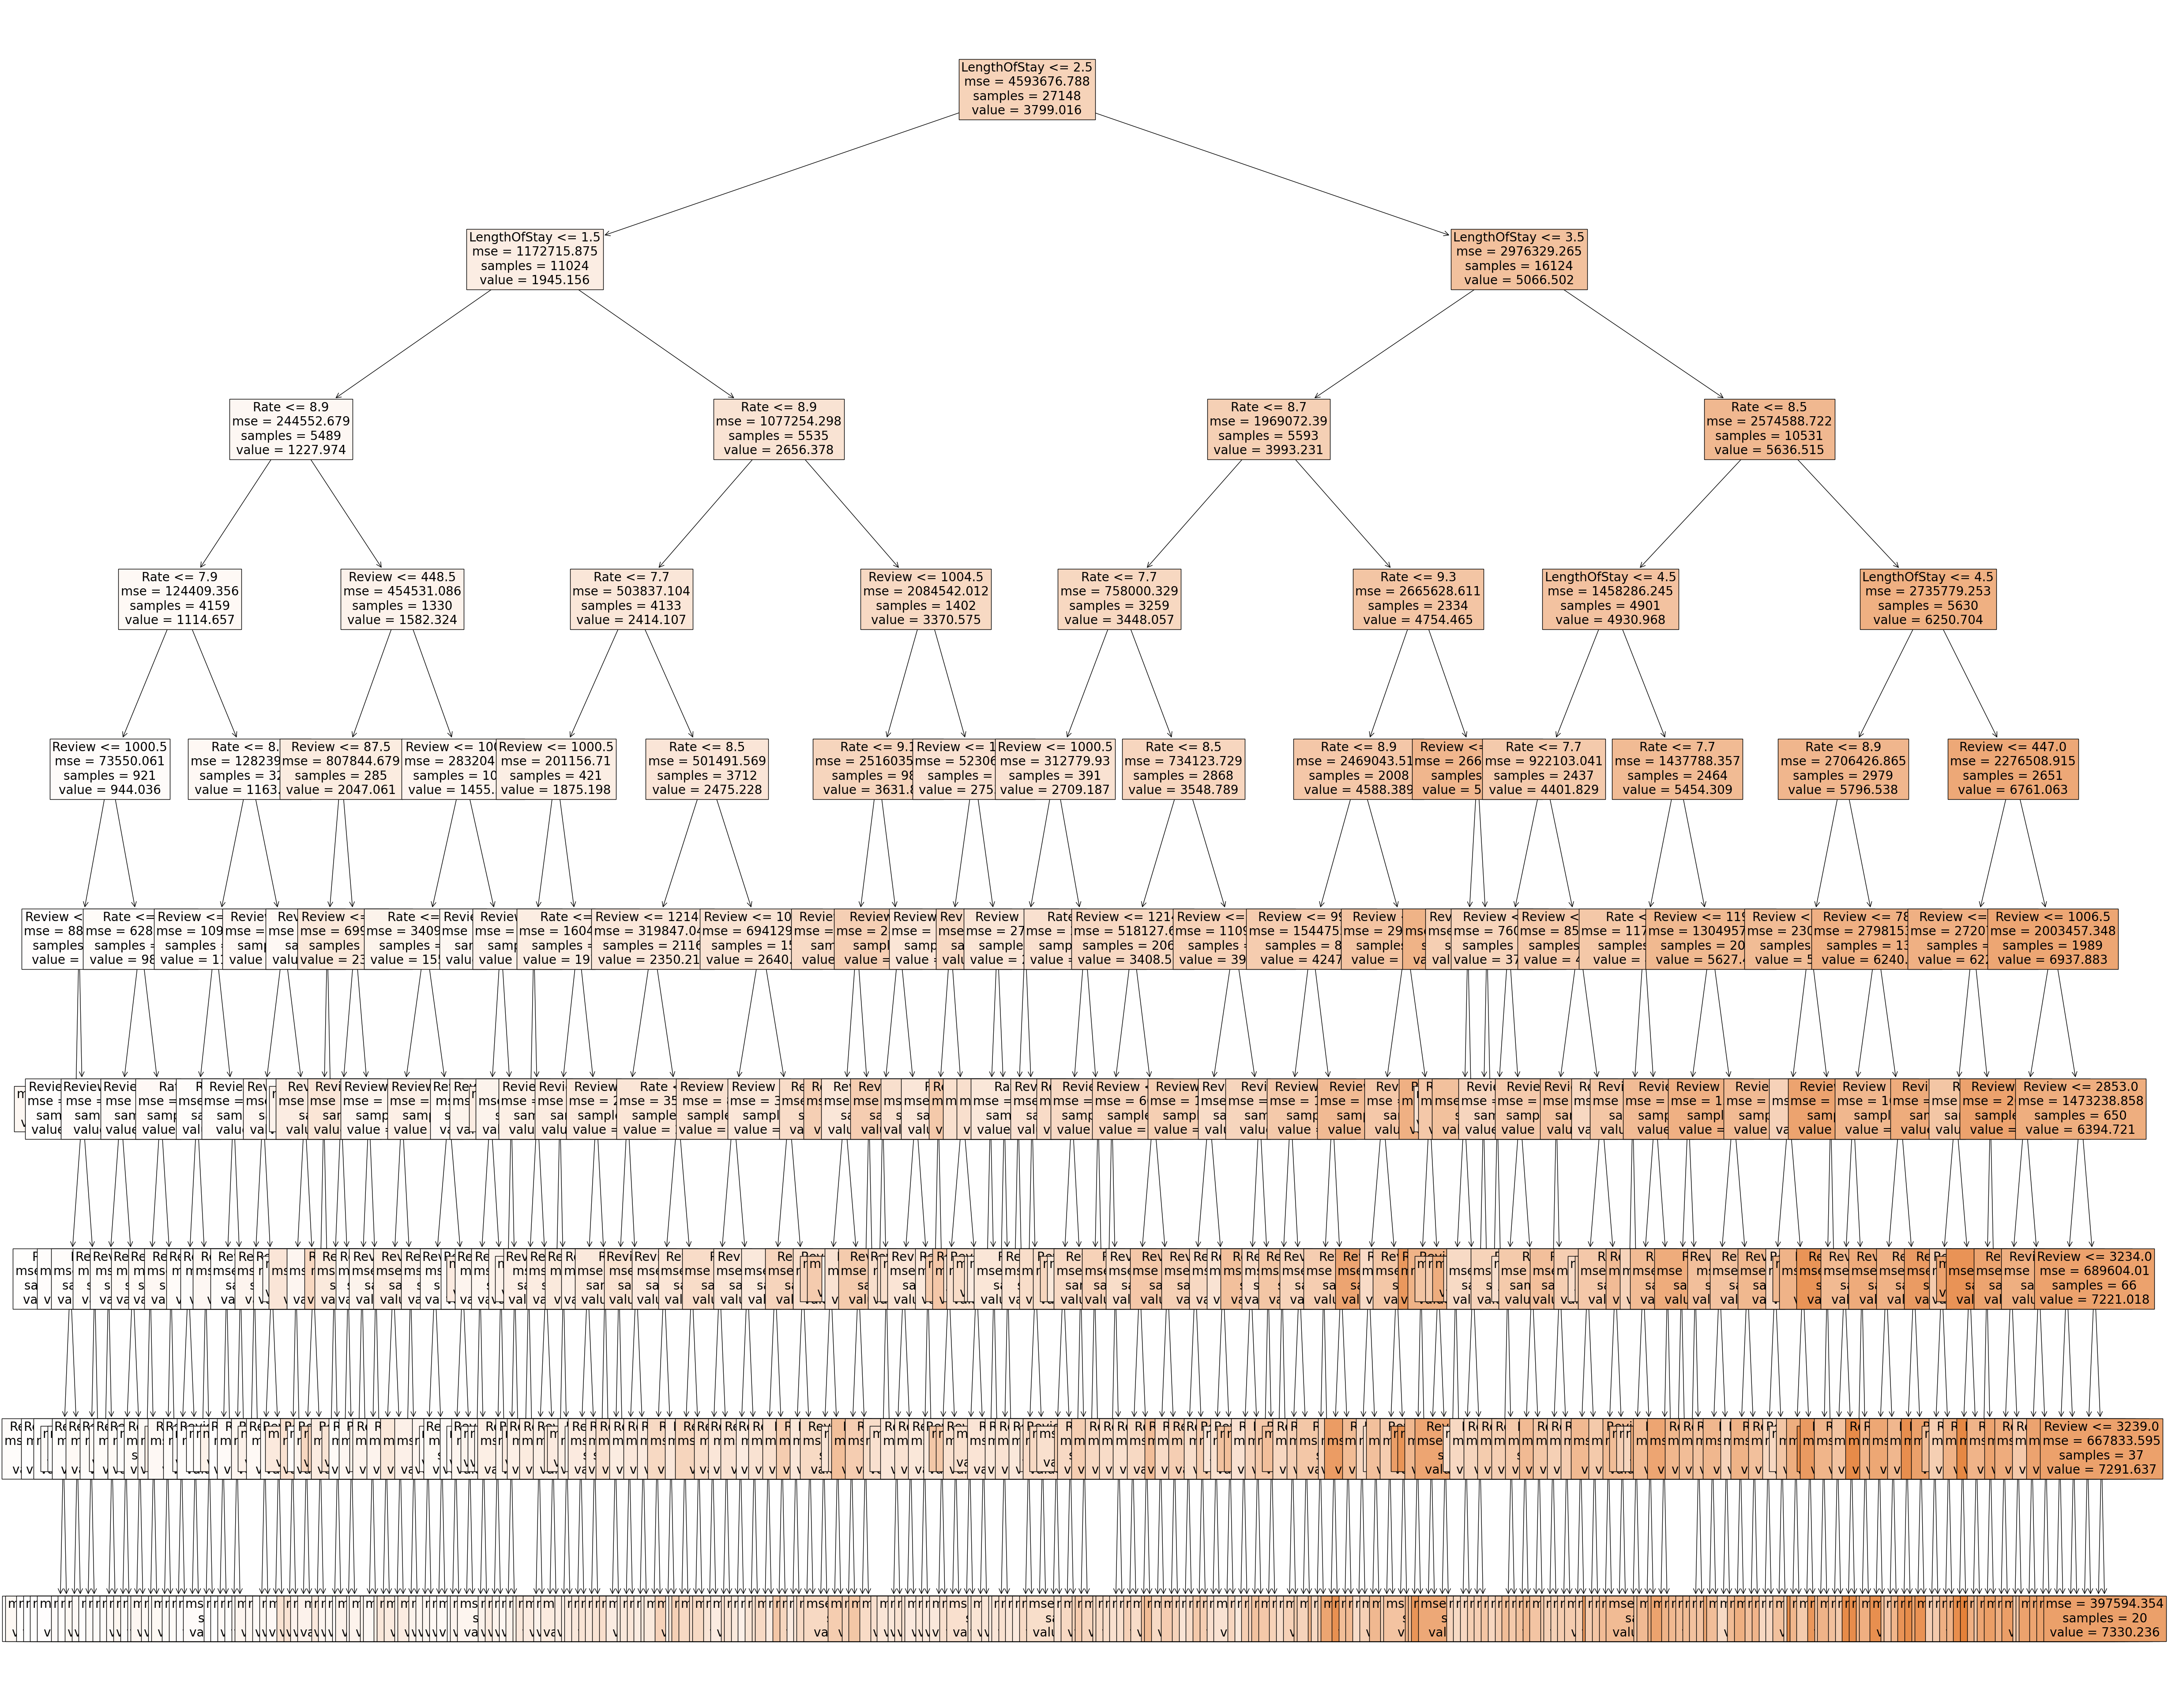

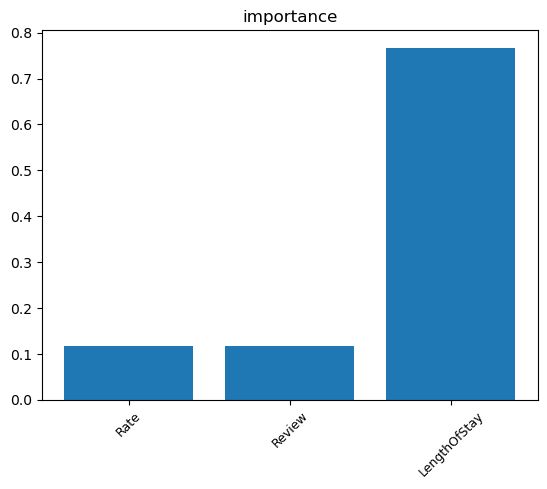

In [6]:
#DecisionTreeRegressor

# the best Tree regressor
 
reg = tree.DecisionTreeRegressor(criterion='mse', max_depth=9 , min_samples_leaf=9, random_state=101)

# Train the model
        
reg.fit(x_train, y_train)
    
# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)


#Visualisation
fig, axes = plt.subplots(1,1, figsize=(60,50))
tree.plot_tree(reg, feature_names = list(x_train.columns), filled = True,fontsize=20)
fig.savefig('imagename.png')
plt.show()


# get importance
plt.title('importance')
importance = reg.feature_importances_
# summarize feature importance
pyplot.bar([x.columns[j] for j in range(len(importance))], importance)
pyplot.xticks(fontsize = 9,rotation=45)
pyplot.show()

In [7]:
#GaussianProcessRegressor

#Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
normalized = pd.DataFrame(scaled, columns = data.columns)
sampled = normalized.sample(frac=0.25)
x = sampled[['Rate','Review','LengthOfStay']]
y = sampled['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)



# Create model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel , ExpSineSquared , RationalQuadratic, DotProduct
kernel = DotProduct() + WhiteKernel(noise_level=0.5)
reg = GaussianProcessRegressor(kernel=kernel)

# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)








RMSE: 0.116
MSE:  0.013
MAE:  0.084
R2_Test:   0.714
R2_Train:   0.705


In [8]:
#GaussianProcessRegressor



# Create model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel , ExpSineSquared , RationalQuadratic
kernel = 1.0 * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) + WhiteKernel(
    1e-1)
reg = GaussianProcessRegressor(kernel=kernel)

# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)




RMSE: 0.11
MSE:  0.012
MAE:  0.076
R2_Test:   0.745
R2_Train:   0.741


In [9]:
#GaussianProcessRegressor


# Create model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
kernel = ConstantKernel(1.0) + ConstantKernel(1.0) * RBF(10)  + WhiteKernel(5)
reg = GaussianProcessRegressor(kernel=kernel)

# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)




RMSE: 0.109
MSE:  0.012
MAE:  0.076
R2_Test:   0.745
R2_Train:   0.741


RMSE: 0.091
MSE:  0.008
MAE:  0.064
R2_Test:   0.824
R2_Train:   0.837


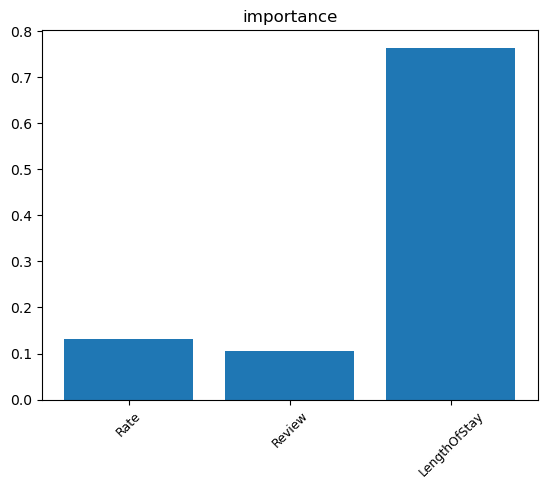

In [10]:
#Gradient Boosting Regression

# Create model
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=101)



# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)



# get importance
plt.title('importance')
importance = reg.feature_importances_
# summarize feature importance
pyplot.bar([x.columns[j] for j in range(len(importance))], importance)
pyplot.xticks(fontsize = 9,rotation=45)
pyplot.show()

In [11]:
#MLPRegressor

# Create model
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(random_state=101)

# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)



RMSE: 0.113
MSE:  0.013
MAE:  0.08
R2_Test:   0.73
R2_Train:   0.716


In [12]:
#Elastic Net Regression


#Create model
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
reg = ElasticNet(random_state=101)


# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)




RMSE: 0.217
MSE:  0.047
MAE:  0.18
R2_Test:   -0.006
R2_Train:   0.0


In [13]:
#Add Features

#Day_of_week_snapshot

from datetime import date, datetime

Day_of_week_snapshot = []
for fulldate in expidiaHotels["SnapShotDate"]:
	date_format = '%Y-%m-%d'
	date = datetime.strptime(fulldate, date_format)
	Day_of_week_snapshot.append(date.strftime('%w'))
expidiaHotels["Day_of_week_snapshot"] = Day_of_week_snapshot
expidiaHotels = expidiaHotels.astype({"Day_of_week_snapshot":int})
expidiaHotels["Day_of_week_snapshot"] += 1


#Number of weekend days
import datetime
from datetime import datetime , timedelta


def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

                
Number_of_weekend_days = []
for start,end in zip(expidiaHotels.Start_Date,expidiaHotels.End_Date):
    count=0
    date_format = '%Y-%m-%d'
    start = datetime.strptime(start, date_format)
    end = datetime.strptime(end, date_format)
    for single_date in daterange(start, end):
        day_of_week = int(single_date.strftime('%w'))+1
        if day_of_week in [5,6,7]:
            count=count+1        
    Number_of_weekend_days.append(count)
expidiaHotels["Number_of_weekend_days"] = Number_of_weekend_days
expidiaHotels = expidiaHotels.astype({"Number_of_weekend_days":"int"})


#price for night

expidiaHotels['Price_per_night'] = expidiaHotels['Price']/ expidiaHotels['LengthOfStay']

#Day of month check in

Day_of_month_check_in = []
for date in expidiaHotels["Start_Date"]:
	date_format = '%Y-%m-%d'
	date = datetime.strptime(date, date_format)
	Day_of_month_check_in.append(date.strftime('%d'))
expidiaHotels["Day_of_month_check_in"] = Day_of_month_check_in
expidiaHotels = expidiaHotels.astype({"Day_of_month_check_in":int})


#Day of month check out

Day_of_month_check_out = []
for date in expidiaHotels["End_Date"]:
	date_format = '%Y-%m-%d'
	date = datetime.strptime(date, date_format)
	Day_of_month_check_out.append(date.strftime('%d'))
expidiaHotels["Day_of_month_check_out"] = Day_of_month_check_out
expidiaHotels = expidiaHotels.astype({"Day_of_month_check_out":int})

RMSE: 1089.64
MSE:  1187315.208
MAE:  784.533
R2_Test:   0.744
R2_Train:   0.746


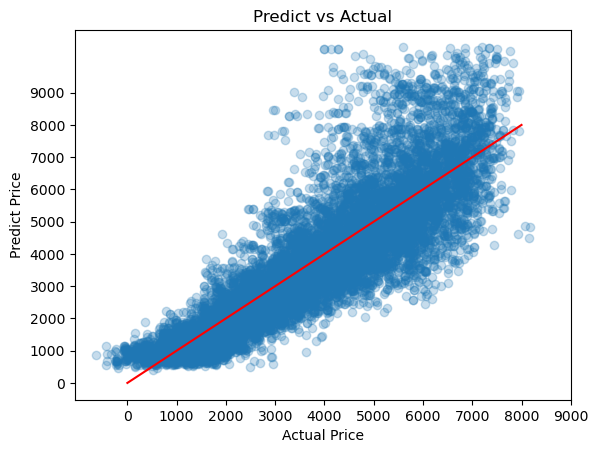

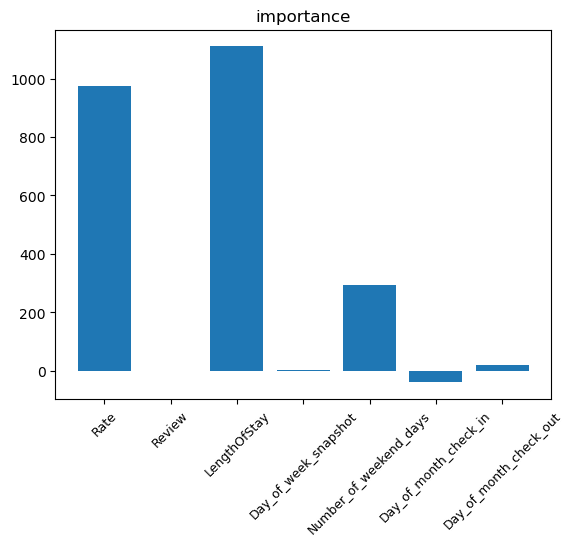

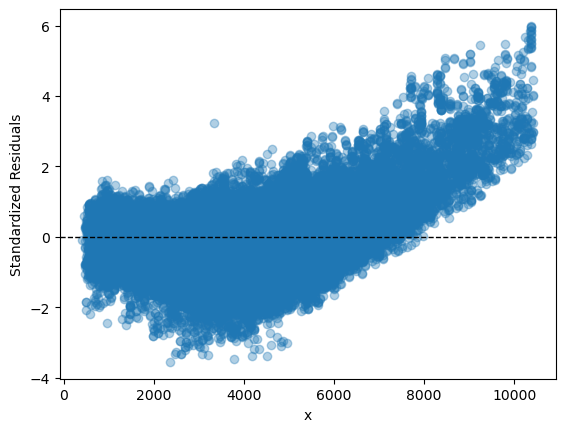

In [14]:
#Prediction with new features

#features + target

x = expidiaHotels[['Rate','Review','LengthOfStay','Day_of_week_snapshot','Number_of_weekend_days','Day_of_month_check_in','Day_of_month_check_out']]
y = expidiaHotels['Price']
data = expidiaHotels[['Rate','Review','LengthOfStay','Price','Day_of_week_snapshot','Number_of_weekend_days','Day_of_month_check_in','Day_of_month_check_out']]


#test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)



#LinearRegression



# Create model
from sklearn import linear_model
reg = linear_model.LinearRegression()
from matplotlib import pyplot

# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)


#Actual vs Predict
plt.title('Predict vs Actual')
plt.xlabel("Actual Price")
plt.ylabel("Predict Price")
X = np.linspace(0,8000,100)
Y = 1*X+0
plt.plot(X, Y, '-r')
plt.scatter(y_pred_test,y_test,alpha=0.25)
plt.xticks(np.arange(0,10000,step=1000))
plt.yticks(np.arange(0,10000,step=1000))
plt.show()




# get importance
plt.title('importance')
importance = reg.coef_
# summarize feature importance
pyplot.bar([x.columns[j] for j in range(len(importance))], importance)
pyplot.xticks(fontsize = 9,rotation=45)
pyplot.show()





import statsmodels.api as sm

#add constant to predictor variables
x_r = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x_r).fit() 


#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal



plt.scatter(expidiaHotels['Price'], standardized_residuals,alpha=0.35)
plt.xlabel('x')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

RMSE: 820.455
MSE:  673145.798
MAE:  549.1
R2_Test:   0.855
R2_Train:   0.857


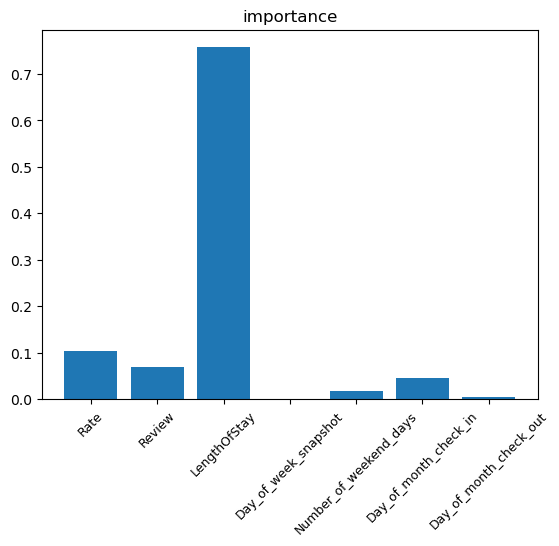

In [15]:
#Gradient Boosting Regression

# Create model
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=101)



# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)



# get importance
plt.title('importance')
importance = reg.feature_importances_
# summarize feature importance
pyplot.bar([x.columns[j] for j in range(len(importance))], importance)
pyplot.xticks(fontsize = 9,rotation=45)
pyplot.show()

In [17]:
#create the csv file
expidiaHotels.to_csv('expidiaHotelsClean2.csv', index=False)

In [18]:
#new split of the data


#GaussianProcessRegressor

data= expidiaHotels[['Price','Rate','Review','LengthOfStay','Day_of_week_snapshot','Number_of_weekend_days','Day_of_month_check_in','Day_of_month_check_out']].copy()


#Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
normalized = pd.DataFrame(scaled, columns = data.columns)
sampled = normalized.sample(frac=0.25)
x = sampled[['Rate','Review','LengthOfStay','Day_of_week_snapshot','Number_of_weekend_days','Day_of_month_check_in','Day_of_month_check_out']]
y = sampled['Price']




RMSE: 894.365
MSE:  799888.914
MAE:  597.432
R2_Test:   0.84
R2_Train:   0.855


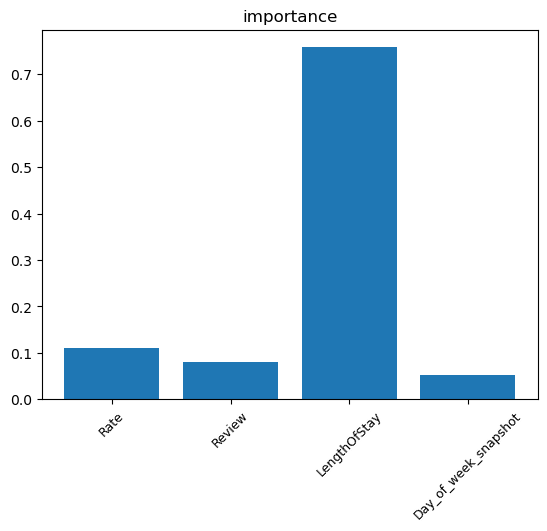

In [21]:
#new split of the data


train = expidiaHotels[expidiaHotels.TimeToTravel < 25]
test = expidiaHotels[expidiaHotels.TimeToTravel > 25]
x_train = train[['Rate','Review','LengthOfStay','TimeToTravel']]
x_test =  test[['Rate','Review','LengthOfStay','TimeToTravel']]
y_train = train['Price']
y_test =  test['Price']



# Create model
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=101)



# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)



# get importance
plt.title('importance')
importance = reg.feature_importances_
# summarize feature importance
pyplot.bar([x.columns[j] for j in range(len(importance))], importance)
pyplot.xticks(fontsize = 9,rotation=45)
pyplot.show()

conclusions:
1. The gradient boost gave the best results.
2. After we added the features our models gave better result.
3. After a different distribution of the train and the test, you can see that the models still give good results.